# A/B Test project

This project was completed on behalf of an online store. 
Collaboration with the marketing department resulted in the development of several hypotheses that are meant to increase sales. Using the ICE and RICE procedures, we will organize the hypotheses according to importance.
Based on the outcomes, we will find the hypothesis with the greatest scores and select the most promising one.

In the second part of the project, we will run an A/B test to compare the conversion ratios across the groups, the relative variations in conversion rates by customer, the typical purchase size, and other variables.

### Table of Content

[**Step 1: Importing Libraries**](#1)

[**Step 2:  Prioritizing Hepotheses**](#2)
* [Hypothesis Preview](#3)
* [Lower Case & String Replace Columns](#4)
* [Ice & Rice Calculations](#5)
* [Insights](#6)

[**Step 3: A/B Test Analysis**](#7)
* ["Orders" Data Set: Preiview](#8)
* [Transforming 'date' Column](#9)
* [Checking Missing Values & Data Inconsistency](#10)
* [Center location & Dispersion Indicies](#11)
* [Test Preperations: Creating Groups](#12)
* ["Visits" Data Set: Preview](#13)
* [Transforming 'date' Column](#14)
* [Checking Missing Values & Data Inconsistency](#15)
* [Test Preperations: Aggregated Data From Visits](#16)
* [Merging Aggregated Data Frames](#17)
* [Step 3: Summary](#18)

[**Step 4: Visualizing A/B Test Results**](#19)
* [Cumulative Revenue By Group](#20)
* [Cumulative Average Order Size By Group](#21)
* [Relative Difference: Average Purchase Size](#22)
* [Conversion Rate By Day](#23)
* [Relative Difference: Conversion Rate](#24)
* [Orders Per User](#25)
* [Order Price Distribution](#26)
* [Raw Data Comparison: Statistical Significance of Conversion Difference between Groups](#27)
* [Filtered Data Comparison: Statistical Significance of Conversion Difference between Groups](#28)
* [Proportion Equality Test](#29)
* [Daily Conversion Equality Test](#30)
* [Average Check](#31)
* [Filtered vs Raw Data Tests: Average Purchase Size](#32)

[**Final Conclusions**](#33)

<a id="1"></a>

### Importing Libraries

In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as mth
import random

# Setting a wide display of the column width (displaying full strings of the hepotheses sentences):

pd.set_option('display.max_colwidth', -1)

### Prioritizing hypotheses

<a id="2"></a>

In [3]:
try:
    hypotheses=pd.read_csv("/Users/ohayo/Desktop/Data/hypotheses_us.csv", sep=';', dtype={'Hypothesis': 'category'})
    orders=pd.read_csv("/Users/ohayo/Desktop/Data/orders_us.csv")
    visits=pd.read_csv("/Users/ohayo/Desktop/Data/visits_us.csv")
except:
    hypotheses=pd.read_csv("/datasets/hypotheses_us.csv", sep=';', dtype={'Hypothesis': 'category'})
    orders=pd.read_csv("/datasets/orders_us.csv")
    visits=pd.read_csv("/datasets/visits_us.csv")

#### Hypothesis Preview

<a id="3"></a>

In [103]:
# first glimpse of hypotheses by using info() & head() methods:

display(hypotheses.info(memory_usage='deep'))
display()
display(hypotheses.head(9))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hypothesis  9 non-null      category
 1   reach       9 non-null      int64   
 2   impact      9 non-null      int64   
 3   confidence  9 non-null      int64   
 4   effort      9 non-null      int64   
 5   ICE         9 non-null      float64 
 6   RICE        9 non-null      float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 2.1 KB


None

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,16.2


#### Lower Case & String Replace: columns names

In [6]:
hypotheses.columns=hypotheses.columns.str.lower()

hypotheses.columns = hypotheses.columns.str.replace(' ', '_')

<a id="4"></a>

#### Ice & Rice Calculations

<a id="5"></a>

In [7]:
# Calculating 'ICE' , Creating 'ICE' column, Displaying 'ICE' in decending order:
hypotheses['ICE'] = (hypotheses['impact'] * (hypotheses['confidence']) / hypotheses['effort']).round(0)

display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).head(10))

# Calculating 'RICE' , Creating 'RICE' column, Displaying 'RICE' in decending order:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / (hypotheses['effort']).round(0)

display(hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False).head(10))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.0
0,Add two new channels for attracting traffic. T...,13.0
7,Add a subscription form to all the main pages....,11.0
6,Show banners with current offers and sales on ...,8.0
2,Add product recommendation blocks to the store...,7.0
1,Launch your own delivery service. This will sh...,2.0
3,Change the category structure. This will incre...,1.0
4,Change the background color on the main page. ...,1.0
5,Add a customer review page. This will increase...,1.0


,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


#### Insights: Step 2

<a id="6"></a>

# Insights

__The top five hypotheses in the ICE index are:__

1."Launch a promotion that gives users discounts on their birthdays": ICE score: 16.2

2."Add two new channels for attracting traffic. This will bring 30% more users": ICE score: 13.33.

3."Add a subscription form to all the main pages. This will help you compile a mailing list": ICE score: 11.2

4."Show banners with current offers and sales on the main page. This will boost conversion": ICE score: 8.

5."Add product recommendation blocks to the store's site. This will increase conversion and average purchase size":
ICE score: 7.

__The top five hypotheses in the RICE index are:__

1."Add a subscription form to all the main pages. This will help you compile a mailing list": RICE score: 112.2 .

2."Add product recommendation blocks to the store's site. This will increase conversion and average purchase size":
RICE score: 56.

3."Add two new channels for attracting traffic. This will bring 30% more users": RICE score: 40.

4."Show banners with current offers and sales on the main page. This will boost conversion": RICE score: 40.

5."Launch a promotion that gives users discounts on their birthdays": RICE score: 16.2.

__changes in prioritization in some of the hypothses__

When looking at the different scors received by using the rice and ice methods, we see changes in the order of priority:

The most significant change in the order of importance is affecting the hypothesis of __launching of a program that gives discounts on birthdays.__
In the ICE index, this hypothesis received the highest score, while in the RICE index, it reached fifth place.
The __reach__ of the hypothesis is __1__. And since RICE takes into account and evaluates the range customers wich a change would affect, it is not surprising that this hypothesis dropped 4 places in the order of priority.

Why then did the hypothesis reach first place according to the ICE index?
-Because the levels of __confidence__ in the change and the degree of its __impacts__ on the customers are high __(9)__.

One hypothesis that received high ratings in both ICE and RICE is the hypothesis that __adding 2 new channels to attract customers will lead to a 30% increase in their quantity.__

The hypothesis is ranked second in importance according to the ICE index and third in importance in the RICE index.

The degree of __confidence__ in the change is among the highest in hypotheses __(8)__, and the degree of __impact__ is the highest __(10)__. Its __reach__ is __relatively low and stands at 3__. Since the degree of __efforts__ needed for change is __relatively high and stands at 6__, and combined with a low range of __reach__, the hypothesis does not occupy the first place in the __RICE__ index.

Another hypothesis that received high ratings in both methods is the hypothesis that __"adding a registration form to all the main pages will help us in creating a mailing list.__

ICE scored this hypothesis with __11.2__ and it is in third place according to the method. On the other hand, in the RICE method, which takes into account the reach to customers, this hypothesis receives the highest rating and by a considerable margin from the rest of the hypotheses with a score of __112__.

This is not surprising since the __reach__ of the change is __10__ and is the highest among the hypotheses.
The degree of __impact__ and the level of __confidence__ in the change are also relatively high, while the degree of __effort__ is moderate (5).

<a id="7"></a>

### A/B Test Analysis

<a id="8"></a>

#### "Orders" Data Set:  Preiview

In [8]:
# chacking order's info:

display(orders.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


None

In [9]:
# first glimpse of 'orders'

display(orders.head(3))
display(orders.tail(3))
display(orders.sample())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


,transactionId,visitorId,date,revenue,group
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


,transactionId,visitorId,date,revenue,group
403,2890964573,3704741858,2019-08-28,10.1,B


#### Transforming 'date' to Datetime Object:

<a id="9"></a>

In [10]:
# changing the 'date' foramt using map() and 'lambda':

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Checking Missing Values & Data inconsistency

<a id="10"></a>

In [11]:
# checking for missing values in 'orders':

orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
# Checking orders columns for incorrect values

display(orders.date.unique())
display(orders.visitorId.unique())
display(orders.group.unique())

array(['2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-08-03T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-26T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
       '2019-08-04T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-21T00:00:00.000000000',
       '2019-08-08T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-31T00:00:00.000000000', '2019-08-11

array([3312258926, 3642806036, 4069496402, ...,  370388673,  573423106,
       2108080724], dtype=int64)

array(['B', 'A'], dtype=object)

#### Center location & Dispersion Indicies

<a id="11"></a>

In [14]:
# Checking Center location & Dispersion indicies('revenue' alone):

orders.revenue.describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

<a id="12"></a>

#### Test Preperations: Creating Groups

In [15]:
# Seperating the groups

ordersA=orders.query('group == "A"')
ordersB=orders.query('group == "B"')

both_groups = pd.merge(ordersA, ordersB, how='inner', on=['visitorId'])

# These 183 observations are all users observed in both groups. since this not many, 
# we will remove them from our orders for further culculations to be more correct

display('Number of users observed in both groups:', pd.Series(len(both_groups)))
display(both_groups.sample())

bad_list=both_groups['visitorId']

'Number of users observed in both groups:'

0    183
dtype: int64

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
67,2415738512,2038680547,2019-08-25,5.2,A,3666913472,2019-08-15,30.8,B


In [16]:
# creating raw-data copy

raw_orders=orders.copy()

# excluding duplicates ID's and creating a clean data set

orders = orders[~orders['visitorId'].isin(bad_list)]

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [18]:
datesGroups = orders[['date','group']].drop_duplicates() 
display(datesGroups.head(3))

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A


In [19]:
# Here iv'e created aggregated orders by using np.logical, counting unique visitorId & transactionId:

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max',
                                           'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(ordersAggregated.head(3))

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9


#### 'Visits' Data Set: Preview

<a id="13"></a>

In [20]:
# checking visits info:

display(visits.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


None

In [21]:
# checking 'visits' head():

display(visits.head(3))
display(visits.tail(3))
display(visits.sample())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


,date,group,visits
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


,date,group,visits
48,2019-08-18,B,737


#### Transforming 'date' Column to Datetime Object:

<a id="14"></a>

In [22]:
# changing 'date' format:

visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Checking Missing Values & Data inconsistency

<a id="15"></a>

In [24]:
# checking for duplicates

display(visits.duplicated().sum())

# checking the date range

display(visits.date.min())
display(visits.date.max())

0

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [23]:
# checking for missing values in 'visits':

visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [25]:
# Checking to see if I have any unusual values in one of the 'visits' columns:

display(visits.visits.unique())

display(visits.group.unique())

display(visits.date.unique())

array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531], dtype=int64)

array(['A', 'B'], dtype=object)

array(['2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-21T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-24T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-26T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-28

#### Test Preperations: Aggregated Data From Visits:

<a id="16"></a>

In [26]:
# Creating aggregated data set from 'visitors':

visitorsAggregated = datesGroups.apply(lambda x:
                                       visits[np.logical_and(visits['date'] <= x['date'],
                                                                       visits['group'] == x['group'])].
                                       agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])
display(visitorsAggregated.head(4))

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294


#### Merging Aggregated Data Frames

<a id="17"></a>

In [27]:
# Creating 'cumulativeData' frame,  Merging visitorAggregated & ordersAggregated: left & right merge on 'date' & 'group'
## Changing cumulativeData columns names


cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(4))

display(display(cumulativeData.info()))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     float64       
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ KB


None

None

<a id="18"></a>

### Summary

 __'orders' dataframe:__

1 . Changing orders.date format from 'Object' to 'datetime64'.

2 . Checking for missing values in 'orders' - there were none.

3 . Checking the date range - correspond to 'visits' date range.

4 . Checking duplicates rows (aside from duplicates ID's in groups) - there were none.

5 . Checking for unique values in 'orders' columns -  There were none that deserved notice.

6 . Creating/separating ordersA & ordersB than store users that wrongly participate in both test & control groups.
    'bad_list': is a small data frame wich stores that users.
    
7 . Setting a copy of the raw data: 'raw_orders' & excluding duplicates ID's from 'orders'.

8 . Duplicate ID elimination leads to the removal of 181 rows.
    The data frame now has 1016 rows instead of the initial 1197 rows.

9 . Creating 'ordersAggregated' which stores cumulative values of orders revenue.

 __'visits' dataframe:__
 
1 . Changing visits.date format from 'Object' to 'datetime64'.

2 . Checking for missing values in 'visits' - there were none.

3 . Checking the date range - correspond to 'orders' date range.

4 . Checking for duplicates rows - there were none.

5 . Checking unique values in visits columns - There were none that deserved notice.

6 . Creating 'visitorsAggregated' which now stores cumulative values of visits.

7 . Merging 'visitorsAggregated' & 'ordersAggregated' under 'cumulativeData'.

__cumulativeData__:

1 . Contain 6 columns: date, group, orders, buyers, revenue & visitors.

2 . 62 rows of data.


### Visualizing A/B Test Results:

<a id="19"></a>

#### Cumulative Revenue By Group

<a id="20"></a>

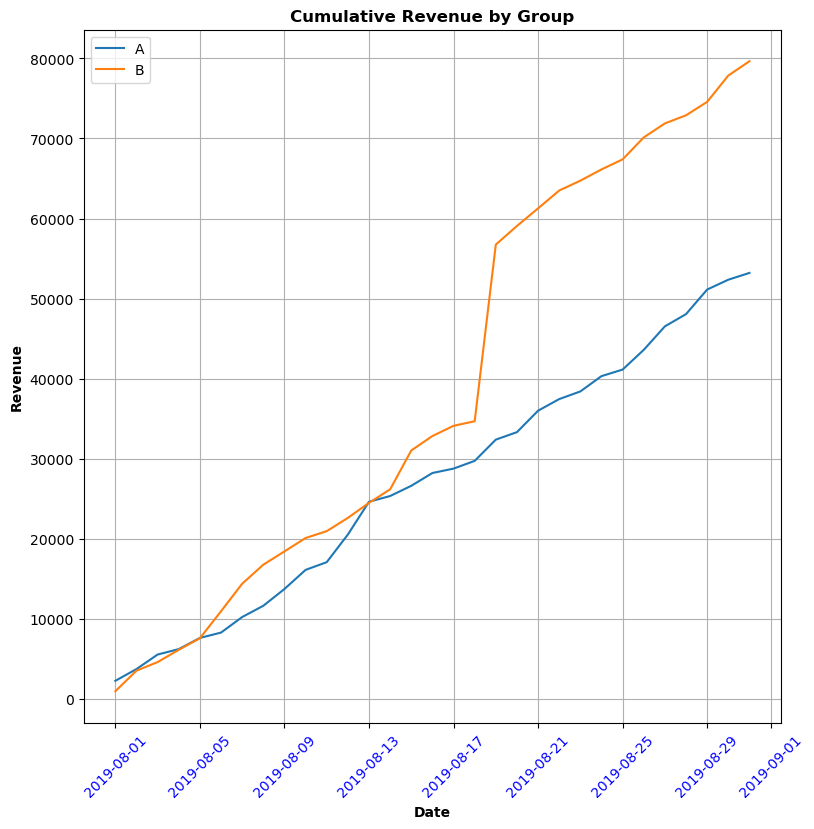

In [30]:
# DataFrame with cumulative orders and cumulative revenue by day, group A

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.rcParams["figure.figsize"]=(9,9)
plt.title('Cumulative Revenue by Group', fontsize='large', fontweight='bold')
plt.ylabel('Revenue', fontsize='medium', fontweight='bold')
plt.xlabel('Date', fontsize='medium', fontweight='bold')
plt.xticks(color='blue', rotation=45)
plt.legend()
plt.grid()
plt.show()

#### Conclusion

Revenue is rising throughout the whole test.

However, As can be observed, group B's cumulative curve exhibits significant revenue peaks beginning in the middle of the month, whereas group A's cumulative curve increases steadily and at a very consistent rate.
This could indicate that group B users placed more expensive orders or that group B orders increased.

<a id="21"></a>

 #### Cumulative Average Order Size By Group

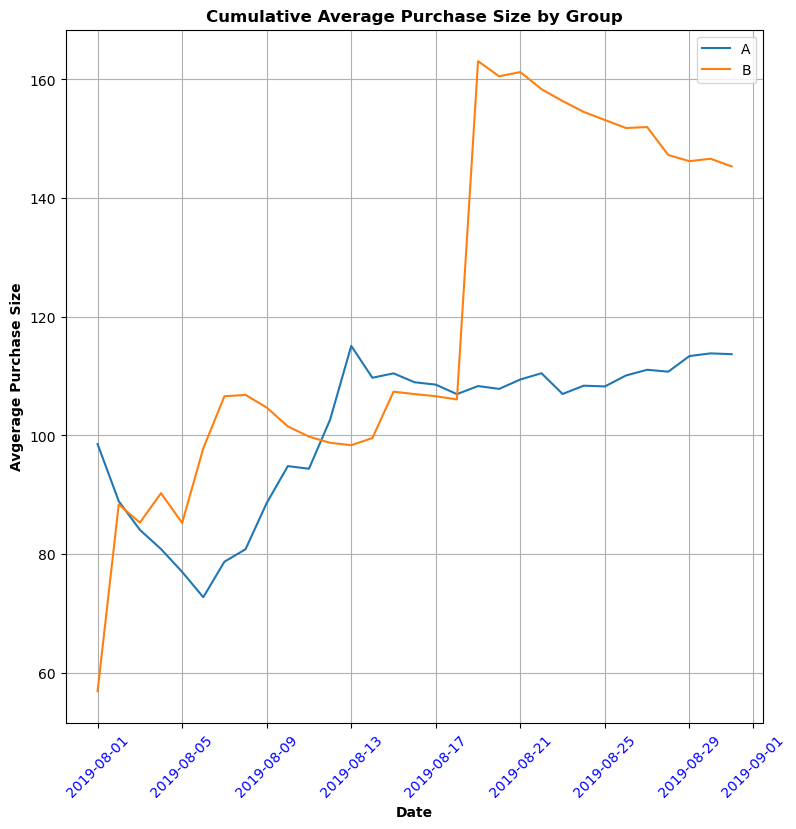

In [33]:
# cumulative average order size by group

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.rcParams["figure.figsize"]=(9,9)
plt.title('Cumulative Average Purchase Size by Group', fontsize='large', fontweight='bold')
plt.ylabel('Avgerage Purchase Size', fontsize='medium', fontweight='bold')
plt.xlabel('Date', fontsize='medium', fontweight='bold')
plt.xticks(color='blue', rotation=45)
plt.yticks(color='black')
plt.legend()
plt.grid()
plt.show()

#### Conclusion

Average purchase size starting to become steady by the end of the test.

it stabilizes for group A and keeps on falling for group B.

The peak in group B's average purchase size and the peak earlier in the cumulative revenue graph (as of 17.8) seems related:

It's possible that users from group B placed expensive orders.

#### Relative Difference: Average Purchase Size

<a id="22"></a>

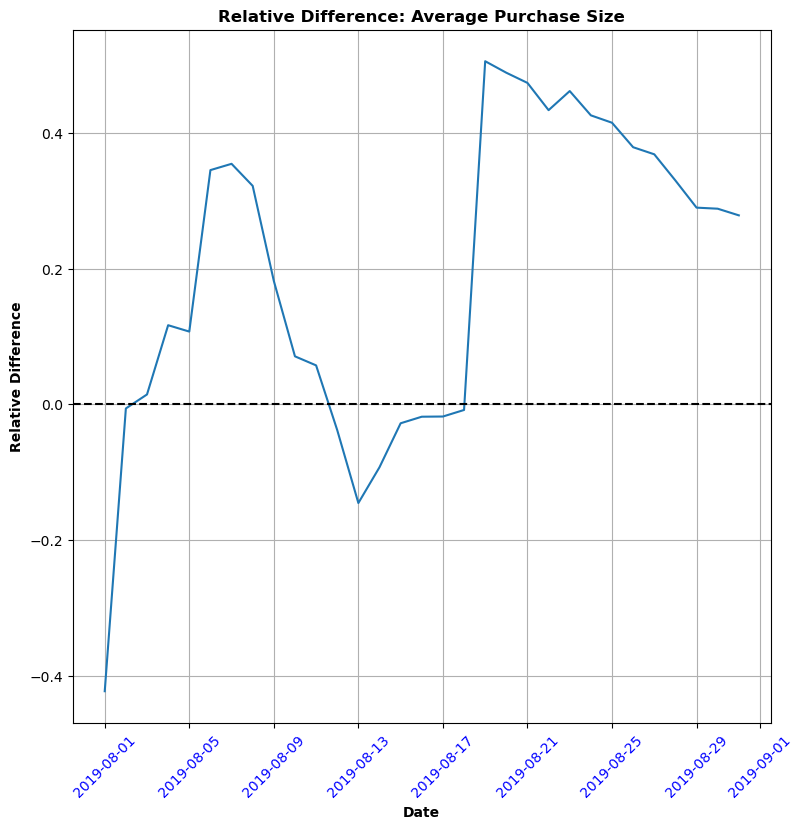

In [104]:
# gathering the data into one DataFrame

mergedCumulativeRevenue = cumulativeRevenueA.\
merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes

plt.\
plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
     (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference: Average Purchase Size', fontsize='large', fontweight='bold')
plt.ylabel('Relative Difference', fontsize='medium', fontweight='bold')
plt.xlabel('Date', fontsize='medium', fontweight='bold')
plt.xticks(color='blue', rotation=45)
plt.grid()
plt.yticks(color='black')
plt.show()

#### Conclusion

There are three points on the test timeline where the average purchase size for the two groups is the same.

On the other hand, group A clients had the highest average purchase size at the start of the test.

On the second day of the test, this tendency started to alter; group B took the lead in terms of the size of the purchase.

On 12.8 group A regained the lead, but by 18.8 customers from group B had added more expensive orders, outpacing those of their friends in group A by a significant margin.

This tendency of the average purchase size's lead position shifting is consistent with the previous graph, which depicts the difference curve as having sharp ascents and descents.

#### Conversion Rate By Day

<a id="23"></a>

In [70]:
# Here i'm pulling 'date' min() & max() values- i'll use them on my next step when i'll plot cumulative conversion:

display(mergedCumulativeRevenue.date.min())
display(mergedCumulativeRevenue.date.max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

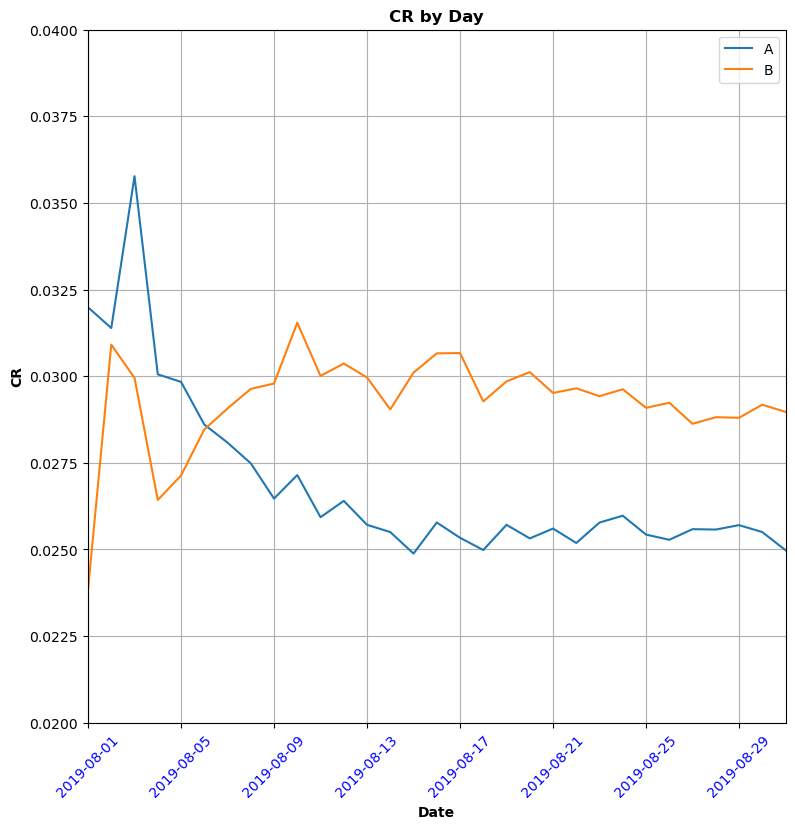

In [36]:
# calculating cumulative conversion

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime("2019-08-31"), 0.02,0.040])
plt.title('CR by Day', fontsize='large', fontweight='bold')
plt.xticks(color='blue', rotation=45)
plt.yticks(color='black')
plt.grid()
plt.ylabel('CR', fontsize='medium', fontweight='bold')
plt.xlabel('Date', fontsize='medium', fontweight='bold')
plt.show()

In [37]:
# calculating the overall conversion rate of each group:

overallConversionA=cumulativeDataA['orders'].sum()/cumulativeDataA['visitors'].sum()
display("The Overall Conversion of Group A:", overallConversionA)

overallConversionB=cumulativeDataB['orders'].sum()/cumulativeDataB['visitors'].sum()
display("The Overall Conversion of Group B:", overallConversionB)

'The Overall Conversion of Group A:'

0.02585769760495693

'The Overall Conversion of Group B:'

0.02943091972438227

#### Conclusion

1 .The graph shows that over the first six days of the test, both group A and group B exhibit peaks in daily conervation, with group A taking the lead.

But as of 08.06, the pattern changes, and for the duration of the test, group B "enjoys" a higher daily conversion ratio than group A.

In the final five days of the test, the daily conversion rate for the two groups appears to stabilize.

2 .The overall conversion of group A is: 0.025.

   The overall conversion of group B is: 0.029.

#### Relative Difference: Conversion Rate

<a id="24"></a>

In [38]:
# merging cumulative data of A & B groups

mergedCumulativeCR = cumulativeDataA.\
merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeCR.head(3)

,date,groupA,ordersA,buyersA,revenueA,visitorsA,conversionA,groupB,ordersB,buyersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,23,19,2266.6,719,0.031989,B,17,17,967.2,713,0.023843
1,2019-08-02,A,42,36,3734.9,1338,0.031390,B,40,39,3535.3,1294,0.030912
2,2019-08-03,A,66,60,5550.1,1845,0.035772,B,54,53,4606.9,1803,0.029950


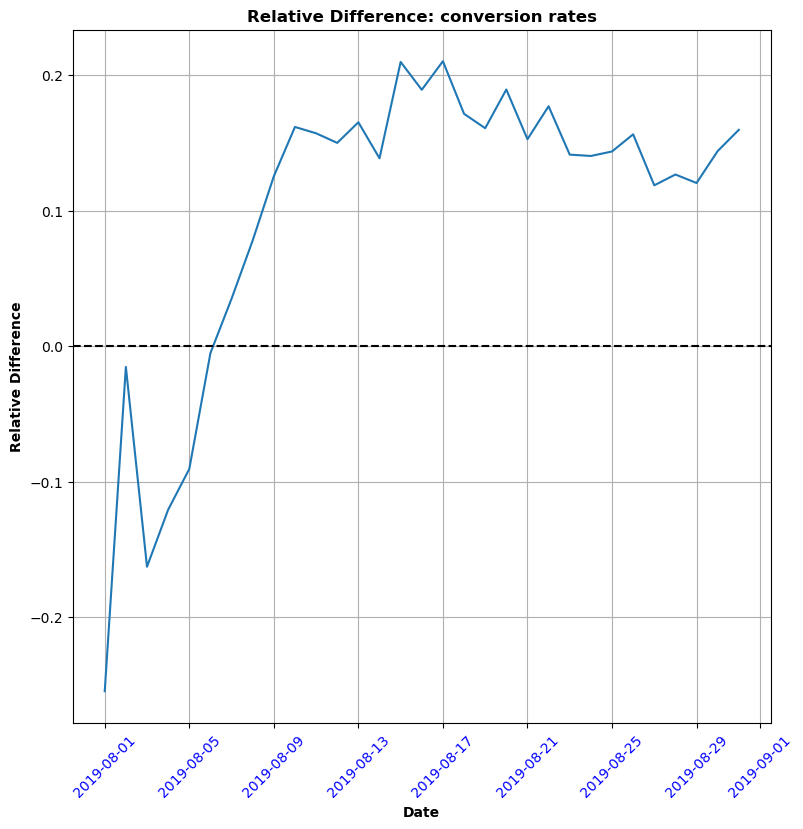

In [41]:
# plotting a relative difference graph  - conversion rates

plt.plot(mergedCumulativeCR['date'], (mergedCumulativeCR['ordersB']/mergedCumulativeCR['visitorsB'])/\
         (mergedCumulativeCR['ordersA']/mergedCumulativeCR['visitorsA'])-1)

# adding the X axis

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference: conversion rates', fontsize='large', fontweight='bold')
plt.ylabel('Relative Difference', fontsize='medium', fontweight='bold')
plt.xlabel('Date', fontsize='medium', fontweight='bold')
plt.xticks(color='blue', rotation=45)
plt.yticks(color='black')
plt.grid()
plt.show()

#### Conclusion

As seen in the conversion ratio comparison graph, group A has a larger conversion ratio than group B for the first six days of the experiment (approximately).

Beginning on the sixth day of the experiment, the pattern changes and group B's conversion ratio overtakes group A's conversion ratio. From this point on until the completion of the trial, group B continues to show the strongest pattern.

On the first day of the test, the difference in conversion ratio between the groups is at its greatest.

Group B ends the test period with a higher conversion rate than Group A.

In [43]:
# setting a frame with orders&transactionId's

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns=['transactionId','orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(3))

,transactionId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3


#### Orders Per User:

<a id="25"></a>

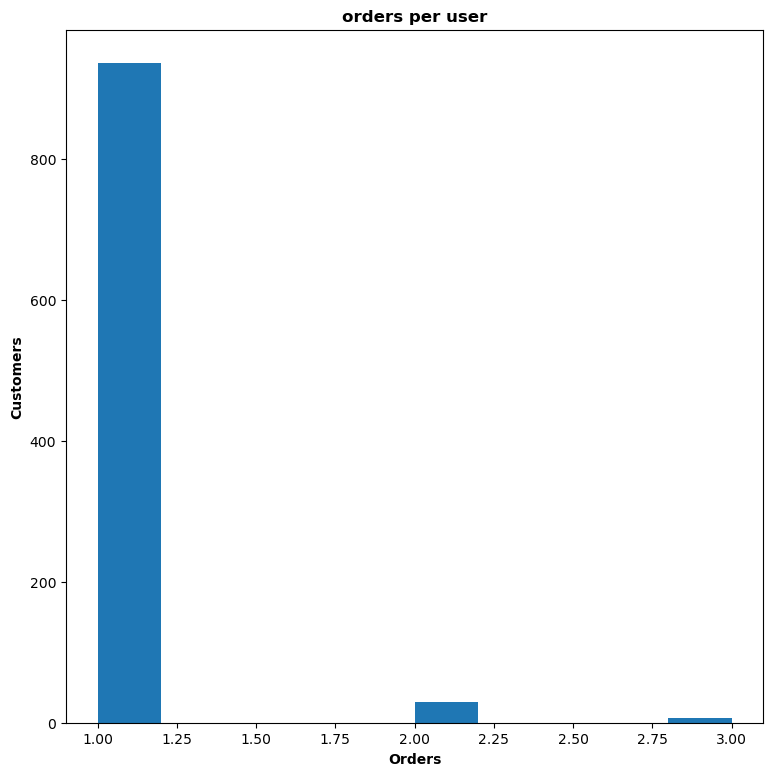

In [44]:
# Plotting a bar chart of the number of orders per user:

plt.hist(ordersByUsers['orders'])
plt.title('orders per user', fontsize='large', fontweight='bold')
plt.ylabel('Customers', fontsize='medium', fontweight='bold')
plt.xlabel('Orders', fontsize='medium', fontweight='bold')
plt.show()

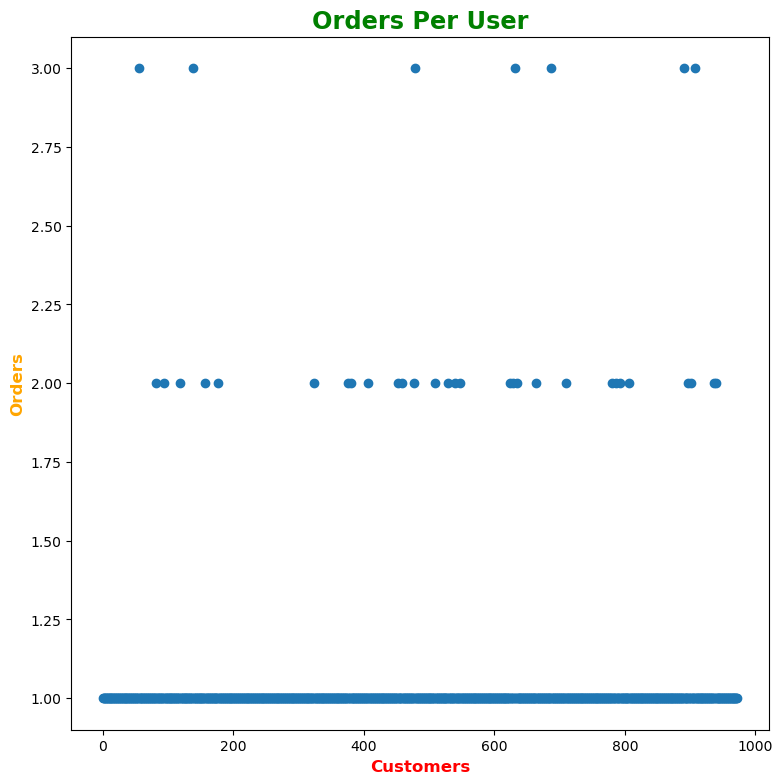

In [45]:
# Plotting a scatter chart of the number of orders per user:

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Orders Per User', color='green', fontsize='xx-large', fontweight='bold')
plt.ylabel('Orders', color='orange', fontsize='large', fontweight='bold')
plt.xlabel('Customers', color='red', fontsize='large', fontweight='bold')
plt.show()

#__Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.__

In [105]:
# Calculating the 95th & 99th percentiles of the number of orders per user
## more than 5% of the customers placed more than 1 orders & at least 1% of the customers placed more than 2 orders.
### the majority of users are placing 1 order.

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


#### Conclusion

1 . The majority of users are placing 1 order.

2 . 5% of the customers placed more than 1 orders.

3 . 1% of the customers placed more than 2 orders.

4 . customers who placed 2 orders and more may be considered as anomaly.

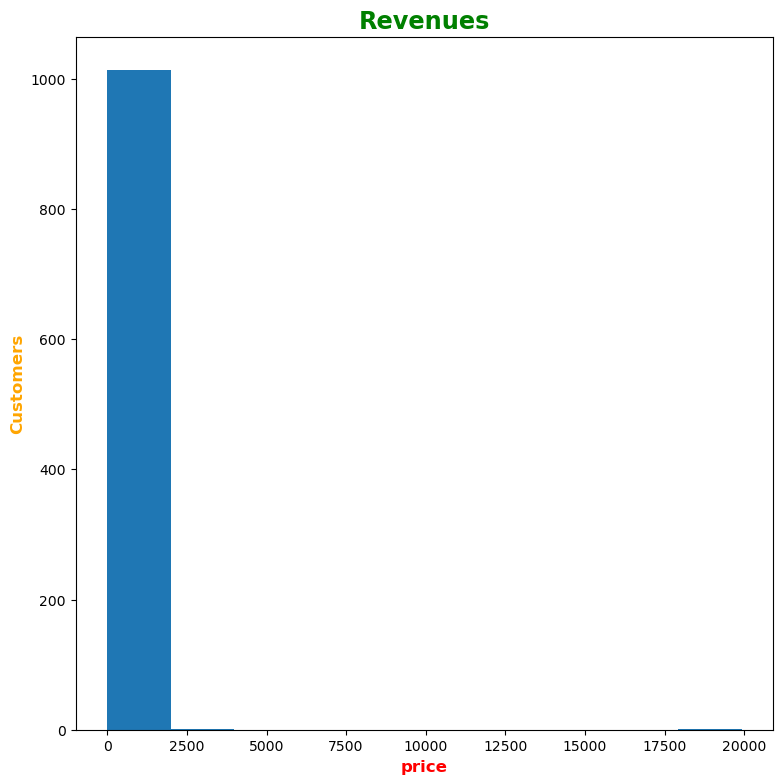

In [47]:
# plotting a bar-chart of the distribution of customers on revenue:

plt.hist(orders['revenue'])
plt.title('Revenues', color='green', fontsize='xx-large', fontweight='bold')
plt.ylabel('Customers', color='orange', fontsize='large', fontweight='bold')
plt.xlabel('price', color='red', fontsize='large', fontweight='bold')
plt.show()

#### Order Price Distribution:

<a id="26"></a>

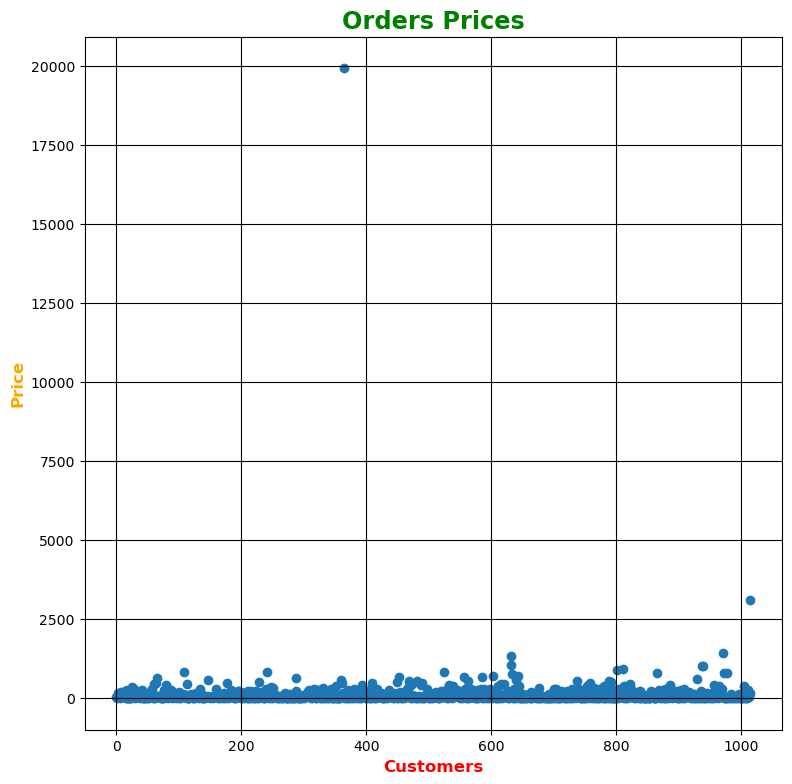

In [59]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# plotting a scatter plot for order prices
## please notice the change in the axis labels: Here i'm setting 'Price' as Y
### This time i've been adding a Grid, makeing visualization more informative (for my taste, of course)

plt.scatter(x_values, orders['revenue'])
plt.grid(color='black', which='major', axis='both')
plt.title('Orders Prices', color='green', fontsize='xx-large', fontweight='bold')
plt.ylabel('Price', color='orange', fontsize='large', fontweight='bold')
plt.xlabel('Customers', color='red', fontsize='large', fontweight='bold')
plt.show()

In [106]:
# overall revenue mean

display(orders.revenue.mean())

# most frequent value of revenue

display(orders.revenue.mode())

130.77086614173223

0    20.2
Name: revenue, dtype: float64

In [63]:
# Calculating the 95th and 99th percentiles of order prices

# more than 5% of users placed orders that cost more than 435.54$.

# not more than 1% of users placed orders that cost more than 900.90$.

display(np.percentile(orders['revenue'], [95, 99]))

array([414.275, 830.3  ])

#### Conclusion

   The average price graph demonstrates:
   
1 . The vast majority of clients placed orders for the common $20 amount.

2 . More than 5% of consumers made purchases totaling $435.54 or more.

3 . Less than 1% of users made purchases totaling more than $900.90.

4 . Customers who ordered at 414.275$ and more might be considered as unusual customers or anomally data.

#### Raw Data Comparison: Statistical Significance of Conversion Difference between Groups

<a id="27" ></a>

In [64]:
# total conversion check
# creating slices of trials & successes

cumulativeDataA_trials=cumulativeDataA['visitors'].sum()
display('Trials:', cumulativeDataA_trials)

cumulativeDataA_successes=cumulativeDataA['buyers'].sum()
display('Successes:', cumulativeDataA_successes)

'Trials:'

305673

'Successes:'

7469

In [65]:
cumulativeDataB_trials=cumulativeDataB['visitors'].sum()
display('Trials:', cumulativeDataB_trials)

cumulativeDataB_successes=cumulativeDataB['buyers'].sum()
display('Successes:', cumulativeDataB_successes)

'Trials:'

307092

'Successes:'

8782

In [67]:
## Writing a function that would check rather the proportion are equal:

# H0: The proportions of A & B's groups are equal
# H1: The proportion of A & B's groups are not equal
## alpha=0.05

def check_hypothses(successes1,trials1, successes2,trials2, alpha=0.05):
    """
    This function tests the equality of proportions between two groups 
    based on the success and attempt rates provided for each group. 
    The function performs a hypothesis test to determine if there is a significant
    difference between the proportions in the two groups.
    
    Parameters:
    - successes1 (int): The number of successes in the first group.
    - trials1 (int): The number of trials attempted in the first group.
    - successes2 (int): The number of successes in the second group.
    - trials2 (int): The number of trials attempted in the second group.
    - alpha (float): The level of significance for the hypothesis test. 
      This parameter is selectable and applied when the function is called..
    """
    # proportion of success in the first group
    
    p1=successes1/trials1
    
    # proportion of success in the seconed group
    
    p2=successes2/trials2
    p_combined = (successes1 + successes2) / (trials1+trials2)
    
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    distr=stats.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', "{:.3f}".format(p_value))
    print('difference:', difference)
    print('z-value:',  z_value)
    
    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different")

In [69]:
# runing a test of proportions:

check_hypothses(cumulativeDataA_successes,cumulativeDataA_trials, cumulativeDataB_successes,\
                cumulativeDataB_trials, alpha=0.05)

p-value:  0.000
difference: -0.00416268509413642
z-value: -10.139883353068885
Rejecting the null hypothesis: there is a significant difference between the proportions


#### Filtered Data Comparison: Statistical Significance of Conversion Difference between Groups

<a id="28"></a>

In [70]:
# Here i'm subsetting orders by groups counting unique ID's in order to filter out users who made placed expenssive orders
# /placed more than one order:

alpha=0.05

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).\
agg({'transactionId' : pd.Series.nunique})

ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).\
agg({'transactionId' : pd.Series.nunique})

ordersByUsersB.columns = ['visitorid', 'transactionid']

In [71]:
# Here im creating two subsets of outliers 
## This lists would serve as data sets wich contain user's ID's that i don't need.
### I would use them later on when filtering - by using opreator 'NOT' ('~') & isin() method.

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionid'] > 1]['visitorid'], 
                                 ordersByUsersB[ordersByUsersB['transactionid'] > 1]['visitorid']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 414.275]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).\
drop_duplicates().sort_values()

print(abnormalUsers.head(3))

print(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
dtype: int64
(86,)


#### Proportion Equality Test:

<a id="29"></a>

In [72]:
# Testing rather the proportions are equal

sampleAFiltered=pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]
                           ['transactionid'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()
- len(ordersByUsersA['transactionid'])),name='transactionid')],axis=0)

sampleBFiltered=pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]
                           ['transactionid'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()
- len(ordersByUsersB['transactionid'])),name='transactionid')],axis=0)

display('Relative Gain: ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

# using mannwhitney test

result = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
display("p-value: ", "{0:.3f}".format(result))

if (result < alpha):
    display("We reject the null hypothese")
else:
    display("We can't reject the null hypothese")

'Relative Gain: '

'0.174'

'p-value: '

'0.016'

'We reject the null hypothese'

#### Conclusion:

Based on the results of the proportion test, we reject the null hypothesis: the conversion rates of the two populations are not equal.

####  Daily Conversion Equality Test

<a id="30"></a>

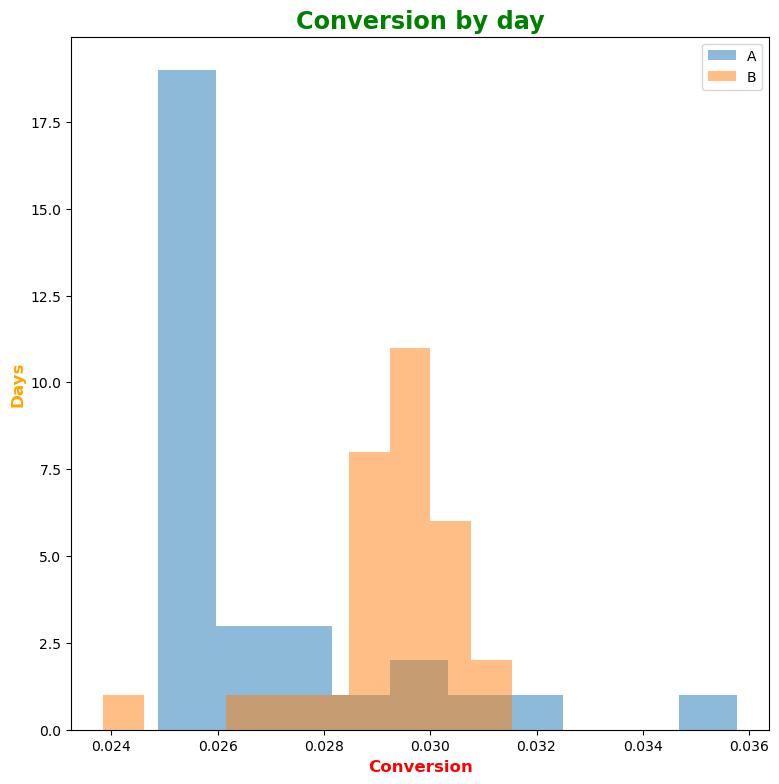

In [73]:
from matplotlib import pyplot # had to import matplotlib again, otherwise the visualization won't work

# plotting the Histogram of daily conversion , using the raw data

pyplot.hist(cumulativeDataA['conversion'], alpha=0.5, label='A')
pyplot.hist(cumulativeDataB['conversion'], alpha=0.5, label='B')
plt.title('Conversion by day', color='green', fontsize='xx-large', fontweight='bold')
plt.ylabel('Days', color='orange', fontsize='large', fontweight='bold')
plt.xlabel('Conversion', color='red', fontsize='large', fontweight='bold')
pyplot.legend(loc='upper right')
pyplot.show()

In [74]:
# Here I wanted to demonstrate the distortion of the data from a statistical point of view:

# positive skew for group A: the mean > median
if cumulativeDataA['conversion'].mean() < cumulativeDataA['conversion'].median():
    display('Group A daily conversion distribution is negatively distorted')
if cumulativeDataA['conversion'].mean() > cumulativeDataA['conversion'].median():
    display('Group A daily conversion distribution is positively distorted')

# negative skew for group B: the mean < median
if cumulativeDataB['conversion'].mean() < cumulativeDataB['conversion'].median():
    display('Group B daily conversion distribution is negatively distorted')
if cumulativeDataB['conversion'].mean() > cumulativeDataB['conversion'].median():
    display('Group B daily conversion distribution is positively distorted')

'Group A daily conversion distribution is positively distorted'

'Group B daily conversion distribution is negatively distorted'

In [75]:
# Defining H0,H1:
# H0: "The daily conversion of the two populations are the same"
# H1: "The daily conversion of the two populations are not the same"

def testing_average(sample1,sample2,alpha=0.05):
    """
    This function is designed to perform a statistical hypothesis test to compare two samples. 
    The function is reusable and can be used to select the appropriate test based on the normality assumption of the data.
    The function first checks for normality assumption by performing the Shapiro-Wilk test on each sample. 
    If the results of the Shapiro-Wilk tests for both samples together are greater than the specified 
    significance level (alpha), it is assumed that both samples are normally distributed, and a two-sample
    t-test is performed, considering two scenarios of equal variance. 
    If one or both of the samples do not follow a normal distribution, the function performs the Mann-Whitney test.
    
    Parameters:

    sample1 (str): The name of the first sample, which should be provided as a list or Pandas Series object.
    sample2 (str): The name of the second sample, which should be provided as a list or Pandas Series object.
    alpha (float): The significance level to be used in the hypothesis test.
    
    Returns:

    p-value: The p-value obtained from the hypothesis test.
    Conclusion: A statement indicating whether the null hypothesis is accepted or rejected based on the p-value
                and the specified significance level.
    """
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Failed to Reject H0')

In [77]:
# checking the equality of the daily conversion by using the raw data:

testing_average(cumulativeDataA['conversion'],cumulativeDataB['conversion'],alpha=0.05)

1.4496661752238628e-05
Reject H0


In [78]:
# checking the equality of the daily conversion by using the filtered data:

# Here i'm filtering my data by excluding users with many orders & users with expanssive orders.
## i'm using operator 'not' in combined with isin(). the lists were created earlier.

ordersFiltered=orders[~orders['visitorId'].isin(usersWithManyOrders)]
ordersFiltered=orders[~orders['visitorId'].isin(usersWithExpensiveOrders)]
ordersFiltered.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [79]:
datesGroupsFiltered = ordersFiltered[['date','group']].drop_duplicates() 
display(datesGroupsFiltered.head(3))

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A


In [80]:
ordersAggregatedFiltered = datesGroupsFiltered.apply(lambda x: ordersFiltered[np.logical_and(ordersFiltered['date'] <= x['date'],
                                                                     ordersFiltered['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max',
                                           'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(ordersAggregatedFiltered.head(3))

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,21,17,1370.5
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,40,34,2838.8


In [81]:
cumulativeDataFiltered=ordersAggregatedFiltered.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeDataFiltered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeDataFiltered.head(4))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,21,17,1370.5,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,40,34,2838.8,1338
3,2019-08-02,B,38,37,2469.7,1294


In [82]:
# calculating cumulative conversion using the filtered data

cumulativeDataFiltered['conversion'] = cumulativeDataFiltered['orders']/cumulativeDataFiltered['visitors']

# selecting data on group A

cumulativeDataAFiltered = cumulativeDataFiltered[cumulativeDataFiltered['group']=='A']

# selecting data on group B

cumulativeDataBFiltered = cumulativeDataFiltered[cumulativeDataFiltered['group']=='B']

In [83]:
# passing the samples to the fuction

testing_average(cumulativeDataAFiltered['conversion'],cumulativeDataBFiltered['conversion'],alpha=0.05)

9.083854112715242e-05
Reject H0


#### Average Check: 

<a id="31"></a>

In [84]:
# DataFrame with cumulative orders and cumulative revenue by day, group A - Filtered Data

cumulativeRevenueAFiltered = cumulativeDataFiltered[cumulativeDataFiltered['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B - Filtered Data

cumulativeRevenueBFiltered = cumulativeDataFiltered[cumulativeDataFiltered['group']=='B'][['date','revenue', 'orders']]


pd.options.mode.chained_assignment = None # disabeling 'SettingWithCopyWarning'


cumulativeRevenueAFiltered['avg_ch']=cumulativeRevenueAFiltered['revenue']/cumulativeRevenueAFiltered['orders']

cumulativeRevenueBFiltered['avg_ch']=cumulativeRevenueBFiltered['revenue']/cumulativeRevenueBFiltered ['orders']

cumulativeDataAFiltered['avg_ch']=cumulativeDataAFiltered['revenue']/cumulativeDataAFiltered['orders']

cumulativeDataBFiltered['avg_ch']=cumulativeDataBFiltered['revenue']/cumulativeDataBFiltered['orders']

In [85]:
# Testing the average check - raw data

cumulativeRevenueA['avg_ch']=cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
cumulativeRevenueB['avg_ch']=cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']

cumulativeDataA['avg_ch']=cumulativeDataA['revenue']/cumulativeDataA['orders']
cumulativeDataB['avg_ch']=cumulativeDataB['revenue']/cumulativeDataB['orders']

In [86]:
# means of groups A&B - Filtered Data

display(cumulativeRevenueAFiltered['avg_ch'].mean())
display(cumulativeRevenueBFiltered['avg_ch'].mean())

74.80812393999884

72.80123243356623

#### Filtered vs Raw Data Tests: Average Purchase Size

<a id="32"></a>

In [87]:
# testing average purchase sise using the filtered data

# H0: The populations average check (;average purchase size) are equal.
# H1: The populations average check (;average purchase size) are not equal.

testing_average(cumulativeRevenueAFiltered['avg_ch'],cumulativeRevenueBFiltered['avg_ch'],alpha=0.05)

0.20014091620698737
Failed to Reject H0


In [88]:
display(cumulativeRevenueA['avg_ch'].mean())
display(cumulativeRevenueB['avg_ch'].mean())

101.11552841801577

120.76430013945237

In [89]:
# testing average using the raw data

testing_average(cumulativeRevenueA['avg_ch'],cumulativeRevenueB['avg_ch'],alpha=0.05)

0.16338441712343454
Failed to Reject H0


<a id="33"></a>

# Final Conclusions

__1__ . Two out of the nine hypotheses received a high priority rating from the ICE and RICE (combined) indices:
    
   __"Include two new traffic-drawing channels. This will increase usership by 30%"__
    
   __"Include a sign-up form on each of the primary pages. You can build a mailing list with this."__
   
__2__ . I advise using the plan that received the highest rating in the ICE index: __"adding a subscription form".__

   RICE, as opposed to ICE prioritization, considers the range of customers impacted by the modification. 
   actuality, this is the only significant distinction between the two ranking techniques.
   
   The hypothesis for adding a subscription form has the highest score and leads the other hypotheses by a wide margin:
   112 points.
   This is not surprising given that, among the high scores on the confidence & impact scales, 
   the hypothesis obtained the highest score on the "reach" scale. And on the other end of the effort scale, a moderate
   effort is required.
   
__3__ . __Orders per users:__

   The majority of users are placing 1 order.
   
   5% of the customers placed more than 2 orders.
   
   1% of the customers placed more than 4 orders.
   
__4__. __Average purchase size:__

   The average purchase size is: 130.77$
   
   The most frequent price of order is: 20.2$
   
   The vast majority of clients placed orders for the common $20 amount.
   
   Customers who ordered at 414.275$ and more might be considered as unusual customers or anomally data.

__5__. Based on the filtered data - the __overall conversion rates of the populations are not equal.__

__6__. Examining the hypothesis that the __daily conversion rates are equal had showed that there is no equality__ between the conversion rates - the null hypothesis was rejected , both by using the raw & filtered data.

__7__. Testing __average purchase size__ using  __filtered__ & __raw__data yielded a p-value higher than the significance level. That is, the __null hypothesis was not rejected__ - we have no reason to assume that the average purchase size between the two populations is not equal.

__8__. The average purchase size tested using the __raw__ data also yielded a p-value higher than the significance level. Here too, the null hypothesis was not rejected - we have no reason to assume that the average purchase size between the two populations is not equal.

Final Conclusion

   The raw & filtered data revealed statistically significant differences in conversion by day between the groups.
   
   Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
   
   __The groups are not equal in the conversion ratio, but we cannot rule out that they are not equal in average purchase size.__
   
   __Therefore, I state that since the conversion ratio is higher in group B and although the average purchase size may be the same, the experiment should be stopped and it should be determined that group B is the leading group. This group has a higher rate of visitors who become customers, so the experiment for this group is successful.__